# Assignment 2

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to Preview the Grading for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

An NOAA dataset has been stored in the file `data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv`. This is the dataset to use for this assignment. Note: The data for this assignment comes from a subset of The National Centers for Environmental Information (NCEI) Daily Global Historical Climatology Network (GHCN-Daily). The GHCN-Daily is comprised of daily climate records from thousands of land surface stations across the globe.

Each row in the assignment datafile corresponds to a single observation.

The following variables are provided to you:
* **id** : station identification code
* **date**: date in YYYY-MM-DD format (e.g. 2012-01-24 = January 24, 2012)
* **element** : indicator of element type
   * TMAX : Maximum temperature (tenths of degrees C)
   * TMIN : Minimum temperature (tenths of degrees C)
* **value** : data value for element (tenths of degrees C)

For this assignment, you must:
1. Read the documentation and familiarize yourself with the dataset, then write some python code which returns a line graph of the record high and record low temperatures by day of the year over the period 2005-2014. The area between the record high and record low temperatures for each day should be shaded.
2. Overlay a scatter of the 2015 data for any points (highs and lows) for which the ten year record (2005-2014) record high or record low was broken in 2015.
3. Watch out for leap days (i.e. February 29th), it is reasonable to remove these points from the dataset for the purpose of this visualization.
4. Make the visual nice! Leverage principles from the first module in this course when developing your solution. Consider issues such as legends, labels, and chart junk.

The data you have been given is near Ann Arbor, Michigan, United States, and the stations the data comes from are shown on the map below.

# Q1

In [1]:
# read csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

data = pd.read_csv('data/weather.csv',parse_dates=True)

# format Date
data['Date'] = pd.to_datetime(data['Date'], format='%Y-%m-%d')

# leave out 2015
data_0514 = data.drop(data.loc[data['Date'].dt.year==2015].index)

# drop Feb-29
leapyear_mask = (data_0514['Date'].dt.month==2) & (data_0514['Date'].dt.day==29)
ly = data_0514.drop(data_0514[leapyear_mask].index)

# extract TMAX and TMIN 
tmax = ly.loc[ly['Element']=='TMAX']
tmin = ly.loc[ly['Element']=='TMIN']

In [2]:
# find indices of all-time highs by calendar year (group by day and month)
all_max_index = tmax.groupby([tmax['Date'].dt.month, tmax['Date'].dt.day])['Data_Value'].idxmax() 
all_max = tmax.loc[all_max_index]

all_min_index = tmin.groupby([tmin['Date'].dt.month, tmin['Date'].dt.day])['Data_Value'].idxmin() 
all_min = tmin.loc[all_min_index]

# Q2

In [3]:
# retrieve all records in 2015, then all record highs and lows in 2015

y15 = data.loc[data['Date'].dt.year==2015]

y15_max_index = y15.groupby([y15['Date'].dt.month, y15['Date'].dt.day])['Data_Value'].idxmax()
y15_min_index = y15.groupby([y15['Date'].dt.month, y15['Date'].dt.day])['Data_Value'].idxmin()

y15_max = y15.loc[y15_max_index]
y15_min = y15.loc[y15_min_index]

## examine MAX values 

In [4]:
# set index to prepare for merging

all_max.set_index(np.arange(1,366,1),inplace=True)
y15_max.set_index(np.arange(1,366,1),inplace=True)

# merge all_max and y15_max for comparison and rename columns

mmax = pd.merge(all_max, y15_max, how='outer',left_index=True,right_index=True)
mmax.rename(columns={'Data_Value_x':'all_max_val','Data_Value_y':'2015_val','Date_x':'all_max_date','Date_y':'y15_date'},inplace=True)
mmax.drop(['ID_x','ID_y','Element_x','Element_y'],axis=1,inplace=True)

In [5]:
# compare
y15_max_diff = mmax.loc[mmax['all_max_val'] < mmax['2015_val']]

## examine MIN values

In [6]:
# set index to prepare for merging
all_min.set_index(np.arange(1,366,1),inplace=True)
y15_min.set_index(np.arange(1,366,1),inplace=True)

# merge all_min and y15_min for comparison and rename columns

mmin = pd.merge(all_min, y15_min, how='outer',left_index=True,right_index=True)
mmin.rename(columns={'Data_Value_x':'all_min_val','Data_Value_y':'2015_val','Date_x':'all_min_date','Date_y':'y15_date'},inplace=True)
mmin.drop(['ID_x','ID_y','Element_x','Element_y'],axis=1,inplace=True)

In [7]:
# compare
y15_min_diff = mmin.loc[mmin['all_min_val'] > mmin['2015_val']]

# Plot

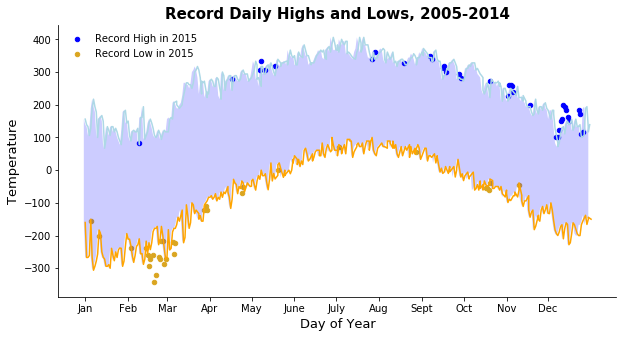

In [15]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
import datetime as dt

plt.figure(figsize=(10,5))
ax = plt.gca()

m = ['Jan','Feb','Mar','Apr','May','June','July','Aug','Sept','Oct','Nov','Dec']
# This is the vital step. It will create a list of day numbers corresponding to middle of each month i.e. 15(Jan), 46(Feb), ... 

ticks = [(dt.date(2017,m,1)-dt.date(2016,12,31)).days for m in range(1,13)]
# It is important to use a non-leap year for this calculation (I used 2017).
# Also, I used (2016,12,15) to substract so that I get middle of each month rather than beginning, it just looks better that way.

#ticks = np.linspace(1,365,12) #own solution, although the month ticks are not exactly accurate

ax.set_xticks(ticks)
ax.set_xticklabels(m) 

# plot lines and scatters
plt.plot(all_max['Date'].dt.dayofyear, all_max['Data_Value'],c='lightblue')
plt.plot(all_min['Date'].dt.dayofyear, all_min['Data_Value'],c='orange')

plt.scatter(y15_max_diff['y15_date'].dt.dayofyear, y15_max_diff['2015_val'],color='blue',s=20,label='Record High in 2015')
plt.scatter(y15_min_diff['y15_date'].dt.dayofyear, y15_min_diff['2015_val'],color='goldenrod',s=20,label='Record Low in 2015')

# fill between the two lines
ax.fill_between(range(len(all_max['Data_Value'])),
                      all_max['Data_Value'], all_min['Data_Value'],
                       facecolor='blue',
                       alpha=0.2
                      )

# failed attempts: see asgm2-take2

# remove spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.legend(frameon=False, loc=2)
plt.xlabel('Day of Year',size=13)
plt.ylabel('Temperature',size=13)
plt.title('Record Daily Highs and Lows, 2005-2014',weight='semibold',size=15)
plt.savefig('../docs/assets/img/weather.png', dpi=75)
plt.show()